In [3]:
import numpy as np
import pandas as pd
import re
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import collections
import pickle

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,DBSCAN
import hdbscan

In [5]:
from model_selection import *
import inspect
print(inspect.getsource(cluster_model))

class cluster_model:
    def __init__(self,name):
        self.name=name
    
    def reduce_pca(self,X,n_components):
        self.pca_model = PCA(n_components=n_components)
        self.pca_features = self.pca_model.fit_transform(X)
        self.pca_components = self.pca_model.components_
        
    def plot_pca_var(self,dpi=None):
        plt.figure(dpi=dpi)
        plt.plot(np.cumsum(self.pca_model.explained_variance_ratio_))
        plt.title('Principal Component Analysis')
        plt.xlabel('number of features')
        plt.ylabel('cumulative explained variance')
        plt.show();
        
    def plot_km_score(self,k_list):
        SSEs = []
        sil = []
        for k in k_list:
            km = KMeans(n_clusters=k, random_state=42, max_iter=100, n_jobs=-1)
            km.fit(self.pca_features)
            labels = km.labels_
            try:
                sil_score = silhouette_score(self.clustered_features,self.clustered_clusters)
            except:
               

In [4]:
df_join_class = pd.read_pickle('pickles/df_join_class.pkl')
df_join_superclass = pd.read_pickle('pickles/df_join_superclass.pkl')
df_join_class_filt5 = pd.read_pickle('pickles/df_join_class_filt5.pkl')
df_join_superclass_filt5 = pd.read_pickle('pickles/df_join_superclass_filt5.pkl')
df_join_class_filt10 = pd.read_pickle('pickles/df_join_class_filt10.pkl')
df_join_superclass_filt10 = pd.read_pickle('pickles/df_join_superclass_filt10.pkl')

model_class_filt0_pca90 = cluster_model('class_filt0_pca90')
model_class_filt0_pca90.reduce_pca(df_join_class.iloc[:,1:],0.9)
model_class_filt0_pca80 = cluster_model('class_filt0_pca80')
model_class_filt0_pca80.reduce_pca(df_join_class.iloc[:,1:],0.8)
model_class_filt0_pca50n = cluster_model('class_filt0_pca50n')
model_class_filt0_pca50n.reduce_pca(df_join_class.iloc[:,1:],50)

model_superclass_filt0_pca90 = cluster_model('superclass_filt0_pca90')
model_superclass_filt0_pca90.reduce_pca(df_join_superclass.iloc[:,1:],0.9)
model_superclass_filt0_pca80 = cluster_model('superclass_filt0_pca80')
model_superclass_filt0_pca80.reduce_pca(df_join_superclass.iloc[:,1:],0.8)
model_superclass_filt0_pca50n = cluster_model('superclass_filt0_pca50n')
model_superclass_filt0_pca50n.reduce_pca(df_join_superclass.iloc[:,1:],50)

model_class_filt5_pca90 = cluster_model('class_filt5_pca90')
model_class_filt5_pca90.reduce_pca(df_join_class_filt5.iloc[:,1:],0.9)
model_class_filt5_pca80 = cluster_model('class_filt5_pca80')
model_class_filt5_pca80.reduce_pca(df_join_class_filt5.iloc[:,1:],0.8)
model_class_filt5_pca50n = cluster_model('class_filt5_pca50n')
model_class_filt5_pca50n.reduce_pca(df_join_class_filt5.iloc[:,1:],50)

model_superclass_filt5_pca90 = cluster_model('superclass_filt5_pca90')
model_superclass_filt5_pca90.reduce_pca(df_join_superclass_filt5.iloc[:,1:],0.9)
model_superclass_filt5_pca80 = cluster_model('superclass_filt5_pca80')
model_superclass_filt5_pca80.reduce_pca(df_join_superclass_filt5.iloc[:,1:],0.8)
model_superclass_filt5_pca50n = cluster_model('superclass_filt5_pca50n')
model_superclass_filt5_pca50n.reduce_pca(df_join_superclass_filt5.iloc[:,1:],50)

model_class_filt10_pca90 = cluster_model('class_filt10_pca90')
model_class_filt10_pca90.reduce_pca(df_join_class_filt10.iloc[:,1:],0.9)
model_class_filt10_pca80 = cluster_model('class_filt10_pca80')
model_class_filt10_pca80.reduce_pca(df_join_class_filt10.iloc[:,1:],0.8)
model_class_filt10_pca50n = cluster_model('class_filt10_pca50n')
model_class_filt10_pca50n.reduce_pca(df_join_class_filt10.iloc[:,1:],50)

model_superclass_filt10_pca90 = cluster_model('superclass_filt10_pca90')
model_superclass_filt10_pca90.reduce_pca(df_join_superclass_filt10.iloc[:,1:],0.9)
model_superclass_filt10_pca80 = cluster_model('superclass_filt10_pca80')
model_superclass_filt10_pca80.reduce_pca(df_join_superclass_filt10.iloc[:,1:],0.8)
model_superclass_filt10_pca50n = cluster_model('superclass_filt10_pca50n')
model_superclass_filt10_pca50n.reduce_pca(df_join_superclass_filt10.iloc[:,1:],50)

In [18]:
df_join_class = pd.read_pickle('pickles/df_join_class.pkl')
df_join_superclass = pd.read_pickle('pickles/df_join_superclass.pkl')
model_class_filt0_pca90 = pickle.load(open('pickles/class_filt0_pca90.pkl', 'rb'))
model_class_filt0_pca80 = pickle.load(open('pickles/class_filt0_pca80.pkl', 'rb'))
model_class_filt0_pca50n = pickle.load(open('pickles/class_filt0_pca50n.pkl', 'rb'))
model_superclass_filt0_pca90 = pickle.load(open('pickles/superclass_filt0_pca90.pkl', 'rb'))
model_superclass_filt0_pca80 = pickle.load(open('pickles/superclass_filt0_pca80.pkl', 'rb'))
model_superclass_filt0_pca50n = pickle.load(open('pickles/superclass_filt0_pca50n.pkl', 'rb'))

df_join_class_filt5 = pickle.load(open('pickles/df_join_class_filt5.pkl', 'rb'))
model_class_filt5_pca90 = pickle.load(open('pickles/class_filt5_pca90.pkl', 'rb'))
model_class_filt5_pca80 = pickle.load(open('pickles/class_filt5_pca80.pkl', 'rb'))
model_class_filt5_pca50n = pickle.load(open('pickles/class_filt5_pca50n.pkl', 'rb'))
df_join_class_filt10 = pickle.load(open('pickles/df_join_class_filt10.pkl', 'rb'))
model_class_filt10_pca90 = pickle.load(open('pickles/class_filt10_pca90.pkl', 'rb'))
model_class_filt10_pca80 = pickle.load(open('pickles/class_filt10_pca80.pkl', 'rb'))
model_class_filt10_pca50n = pickle.load(open('pickles/class_filt10_pca50n.pkl', 'rb'))
df_join_superclass_filt5 = pickle.load(open('pickles/df_join_superclass_filt5.pkl', 'rb'))
model_superclass_filt5_pca90 = pickle.load(open('pickles/superclass_filt5_pca90.pkl', 'rb'))
model_superclass_filt5_pca80 = pickle.load(open('pickles/superclass_filt5_pca80.pkl', 'rb'))
model_superclass_filt5_pca50n = pickle.load(open('pickles/superclass_filt5_pca50n.pkl', 'rb'))
df_join_superclass_filt10 = pickle.load(open('pickles/df_join_superclass_filt10.pkl', 'rb'))
model_superclass_filt10_pca90 = pickle.load(open('pickles/superclass_filt10_pca90.pkl', 'rb'))
model_superclass_filt10_pca80 = pickle.load(open('pickles/superclass_filt10_pca80.pkl', 'rb'))
model_superclass_filt10_pca50n = pickle.load(open('pickles/superclass_filt10_pca50n.pkl', 'rb'))

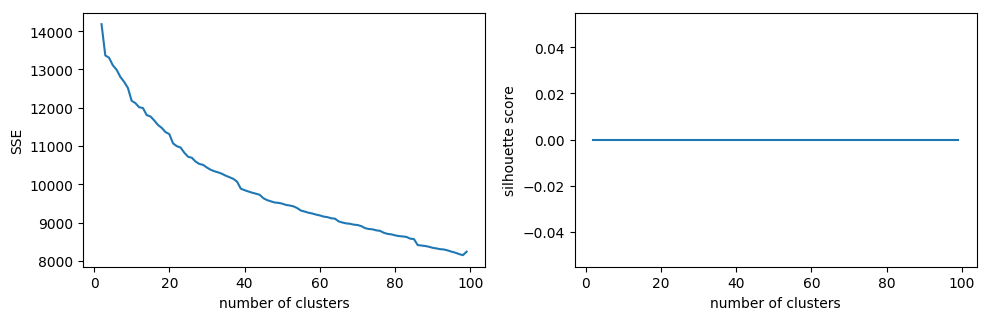

In [10]:
model_class_filt0_pca90.plot_km_score(list(np.arange(2,100)))

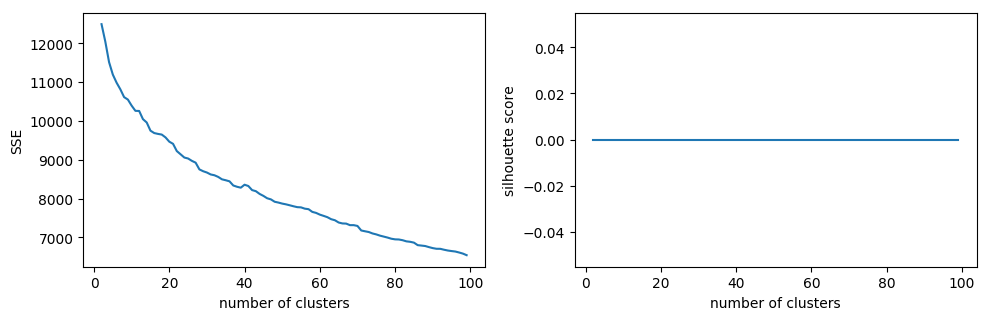

In [11]:
model_class_filt0_pca80.plot_km_score(list(np.arange(2,100)))

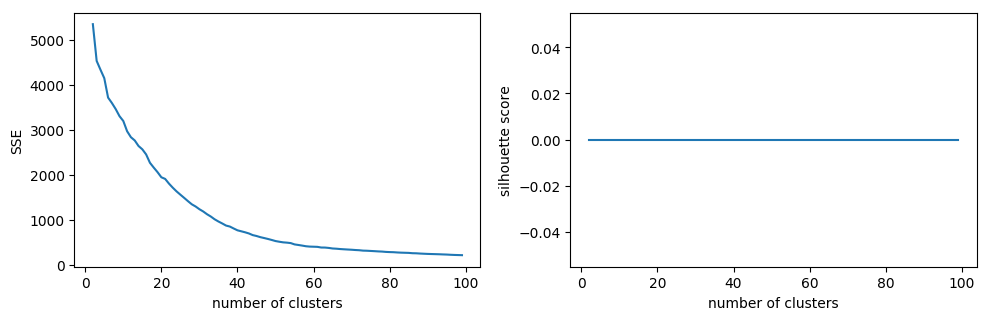

In [12]:
model_class_filt0_pca50n.plot_km_score(list(np.arange(2,100)))

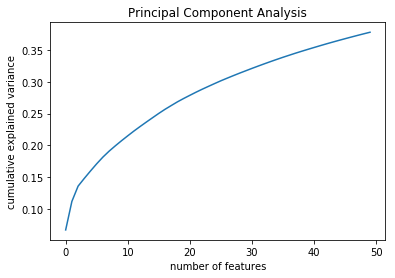

In [13]:
model_class_filt0_pca50n.plot_pca_var()

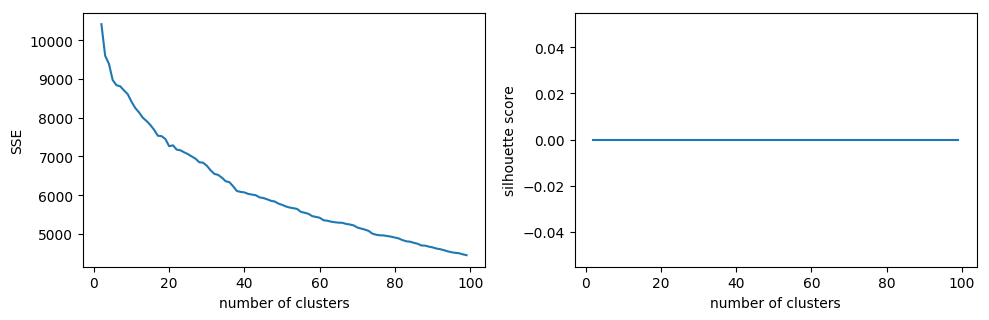

In [18]:
model_class_filt5_pca90.plot_km_score(list(np.arange(2,100)))

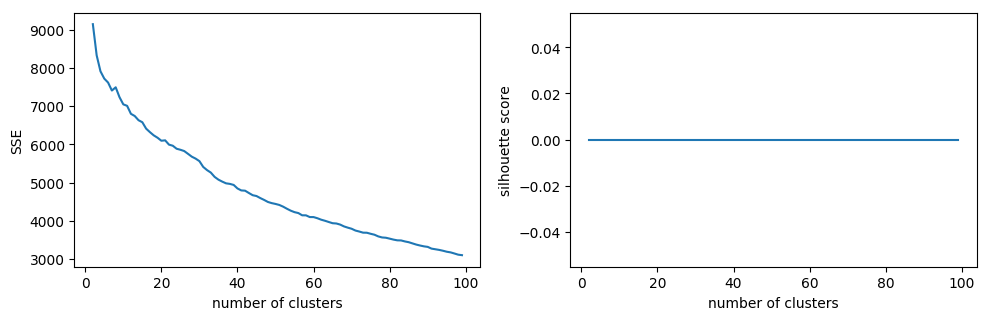

In [19]:
model_class_filt5_pca80.plot_km_score(list(np.arange(2,100)))

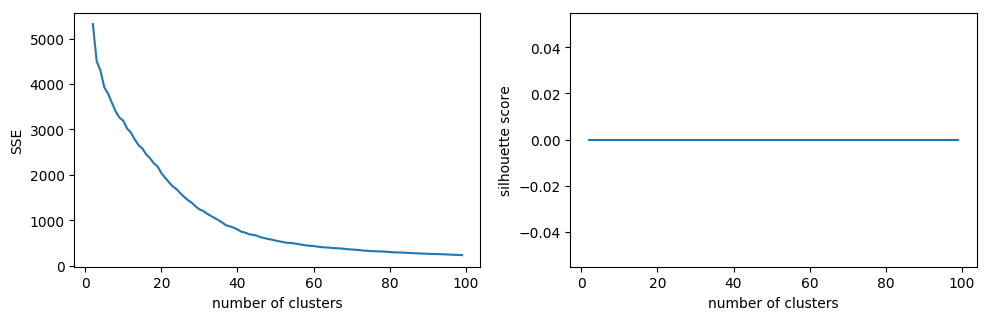

In [5]:
model_class_filt5_pca50n.plot_km_score(list(np.arange(2,100)))

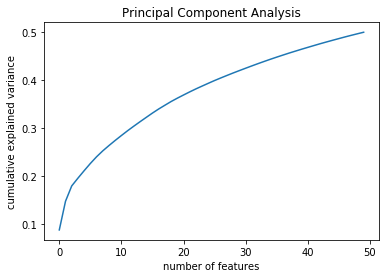

In [22]:
model_class_filt5_pca50n.plot_pca_var()

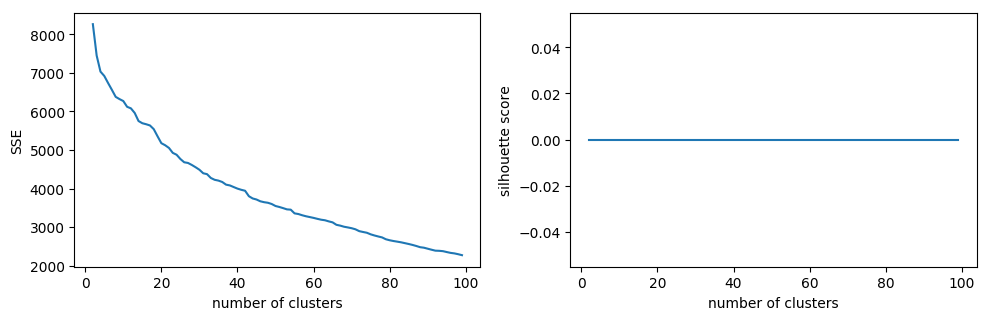

In [6]:
model_class_filt10_pca90.plot_km_score(list(np.arange(2,100)))

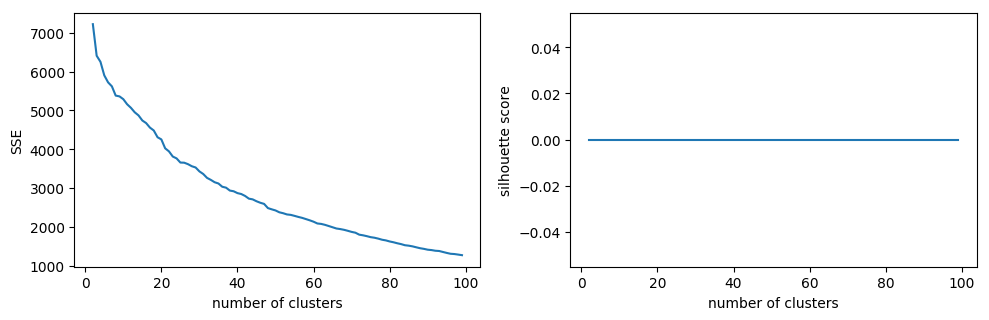

In [7]:
model_class_filt10_pca80.plot_km_score(list(np.arange(2,100)))

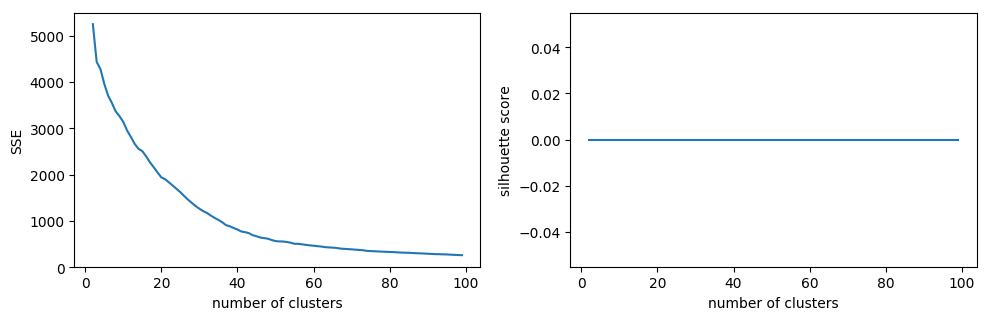

In [8]:
model_class_filt10_pca50n.plot_km_score(list(np.arange(2,100)))

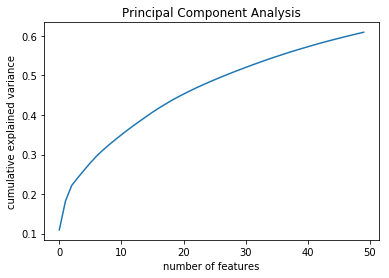

In [23]:
model_class_filt10_pca50n.plot_pca_var()

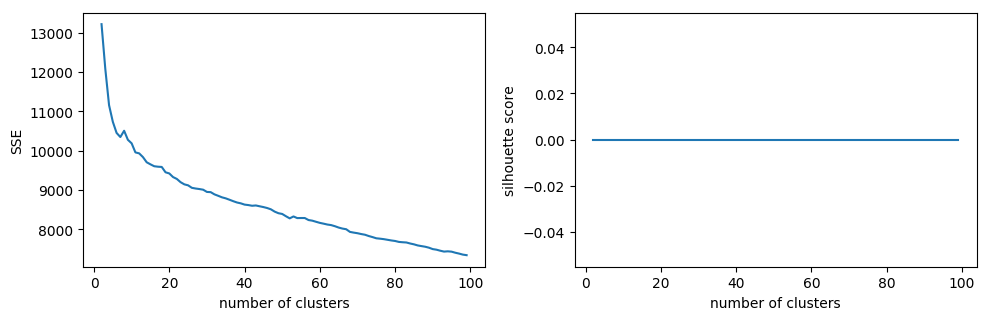

In [14]:
model_superclass_filt0_pca90.plot_km_score(list(np.arange(2,100)))

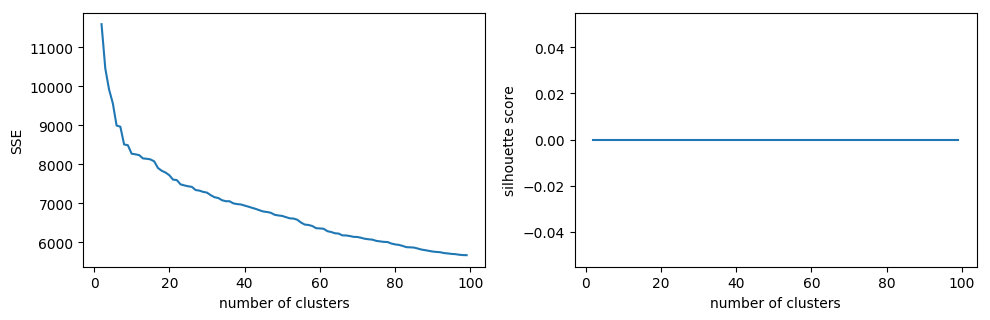

In [15]:
model_superclass_filt0_pca80.plot_km_score(list(np.arange(2,100)))

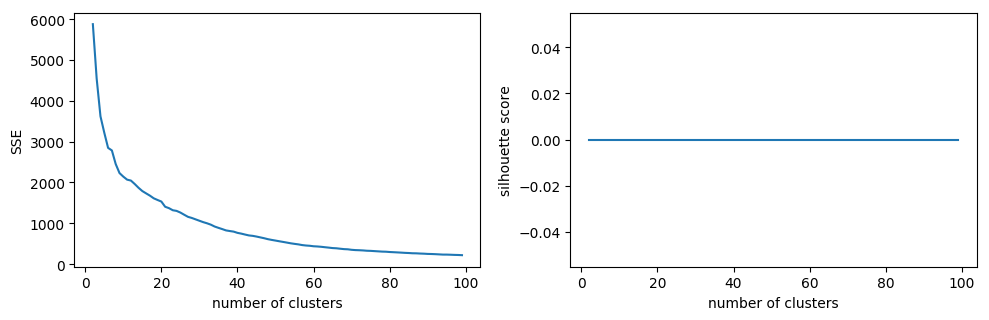

In [16]:
model_superclass_filt0_pca50n.plot_km_score(list(np.arange(2,100)))

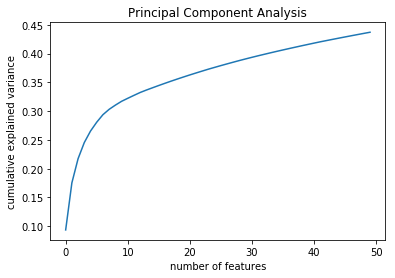

In [17]:
model_superclass_filt0_pca50n.plot_pca_var()

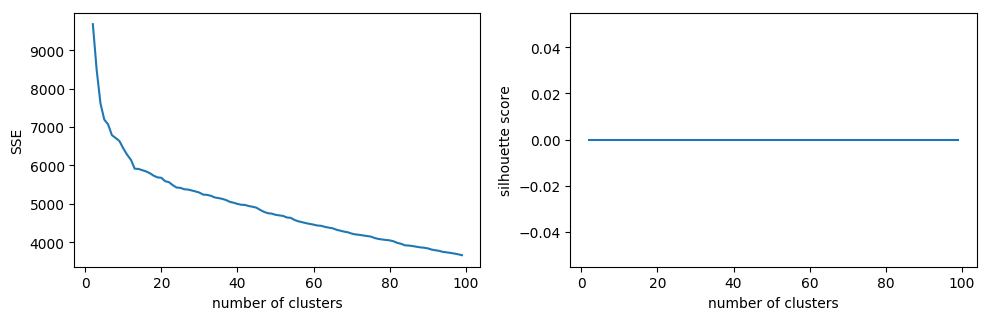

In [9]:
model_superclass_filt5_pca90.plot_km_score(list(np.arange(2,100)))

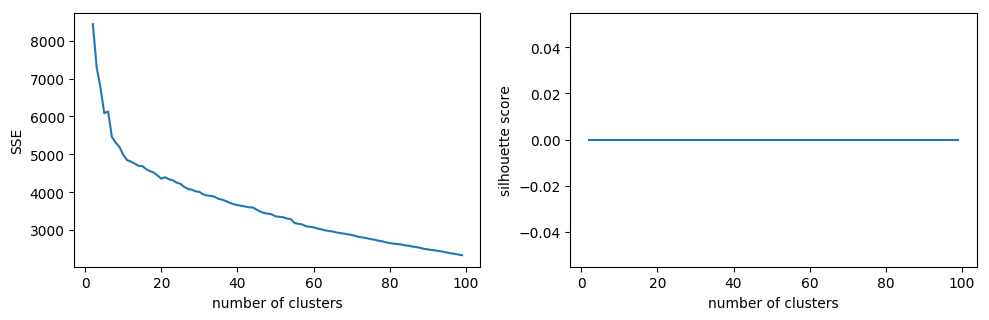

In [10]:
model_superclass_filt5_pca80.plot_km_score(list(np.arange(2,100)))

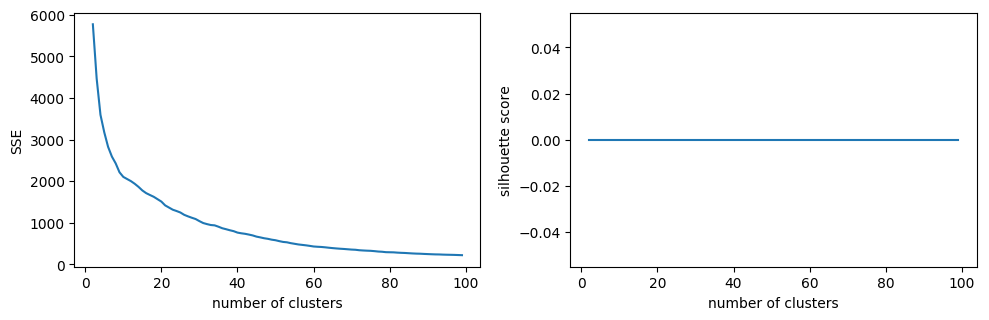

In [11]:
model_superclass_filt5_pca50n.plot_km_score(list(np.arange(2,100)))

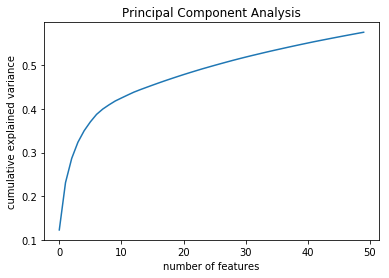

In [24]:
model_superclass_filt5_pca50n.plot_pca_var()

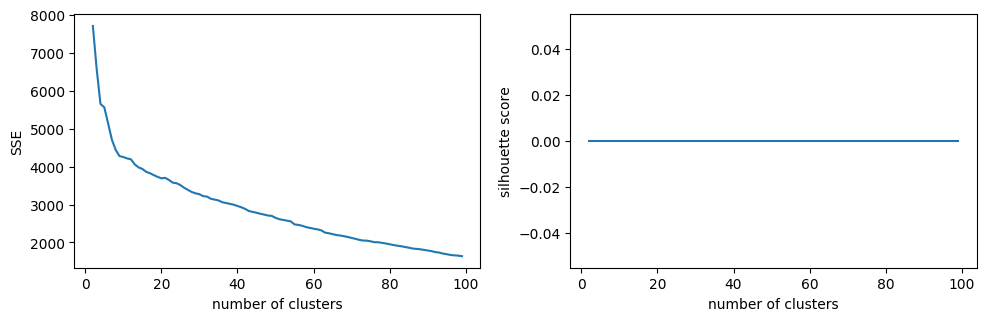

In [12]:
model_superclass_filt10_pca90.plot_km_score(list(np.arange(2,100)))

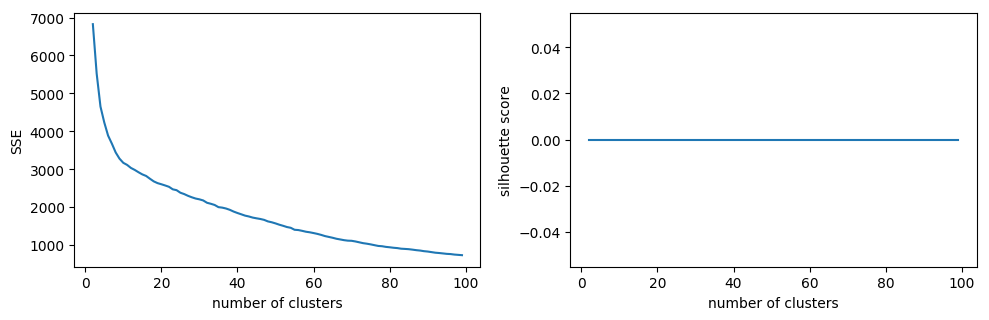

In [13]:
model_superclass_filt10_pca80.plot_km_score(list(np.arange(2,100)))

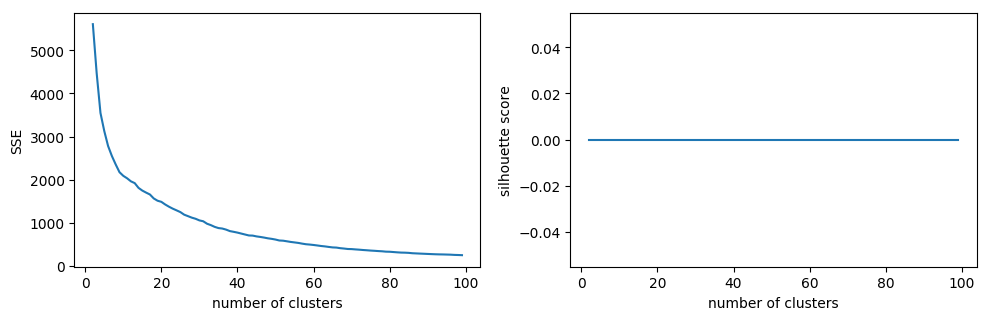

In [14]:
model_superclass_filt10_pca50n.plot_km_score(list(np.arange(2,100)))

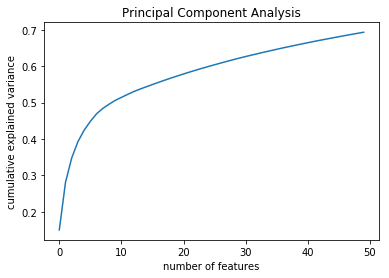

In [25]:
model_superclass_filt10_pca50n.plot_pca_var()

In [15]:
[x for x in dir() if re.search(r'model_',x)!=None]

['model_class_filt0_pca50n',
 'model_class_filt0_pca80',
 'model_class_filt0_pca90',
 'model_class_filt10_pca50n',
 'model_class_filt10_pca80',
 'model_class_filt10_pca90',
 'model_class_filt5_pca50n',
 'model_class_filt5_pca80',
 'model_class_filt5_pca90',
 'model_superclass_filt0_pca50n',
 'model_superclass_filt0_pca80',
 'model_superclass_filt0_pca90',
 'model_superclass_filt10_pca50n',
 'model_superclass_filt10_pca80',
 'model_superclass_filt10_pca90',
 'model_superclass_filt5_pca50n',
 'model_superclass_filt5_pca80',
 'model_superclass_filt5_pca90']

In [19]:
hdbs2 = hdbscan.HDBSCAN(min_cluster_size=2)
for model in [model_class_filt0_pca50n,
             model_class_filt0_pca80,
             model_class_filt0_pca90,
             model_class_filt5_pca50n,
             model_class_filt5_pca80,
             model_class_filt5_pca90,
             model_class_filt10_pca50n,
             model_class_filt10_pca80,
             model_class_filt10_pca90,
             model_superclass_filt0_pca50n,
             model_superclass_filt0_pca80,
             model_superclass_filt0_pca90,
             model_superclass_filt5_pca50n,
             model_superclass_filt5_pca80,
             model_superclass_filt5_pca90,
             model_superclass_filt10_pca50n,
             model_superclass_filt10_pca80,
             model_superclass_filt10_pca90]:
    model.get_clusters(hdbs2)
    model.cluster_info()

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt0_pca50n
unclustered count = 1551
number of clusters = 831
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt0_pca80
unclustered count = 1164
number of clusters = 1204
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt0_pca90
unclustered count = 1034
number of clusters = 1258
sil score = nan
---------------------------
class_filt5_pca50n
unclustered count = 966
number of clusters = 770
sil score = 0.8827265203556997
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt5_pca80
unclustered count = 812
number of clusters = 979
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt5_pca90
unclustered count = 844
number of clusters = 973
sil score = nan
---------------------------
class_filt10_pca50n
unclustered count = 422
number of clusters = 506
sil score = 0.9337198545503281
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt10_pca80
unclustered count = 404
number of clusters = 637
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt10_pca90
unclustered count = 404
number of clusters = 631
sil score = nan
---------------------------
superclass_filt0_pca50n
unclustered count = 1516
number of clusters = 830
sil score = 0.789892546878421
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt0_pca80
unclustered count = 1259
number of clusters = 1195
sil score = nan
---------------------------
superclass_filt0_pca90
unclustered count = 1193
number of clusters = 1214
sil score = 0.6799759382172945
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt5_pca50n
unclustered count = 929
number of clusters = 757
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt5_pca80
unclustered count = 741
number of clusters = 964
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt5_pca90
unclustered count = 726
number of clusters = 957
sil score = nan
---------------------------
superclass_filt10_pca50n
unclustered count = 371
number of clusters = 466
sil score = 0.945440274711158
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_filt10_pca80
unclustered count = 337
number of clusters = 580
sil score = nan
---------------------------
superclass_filt10_pca90
unclustered count = 344
number of clusters = 574
sil score = nan
---------------------------


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


class_filt10_pca90
unclustered count = 404
number of clusters = 631
sil score = nan
---------------------------
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5402 samples in 0.027s...
[t-SNE] Computed neighbors for 5402 samples in 6.985s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5402
[t-SNE] Computed conditional probabilities for sample 2000 / 5402
[t-SNE] Computed conditional probabilities for sample 3000 / 5402
[t-SNE] Computed conditional probabilities for sample 4000 / 5402
[t-SNE] Computed conditional probabilities for sample 5000 / 5402
[t-SNE] Computed conditional probabilities for sample 5402 / 5402
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.470432
[t-SNE] Error after 5000 iterations: -0.105044


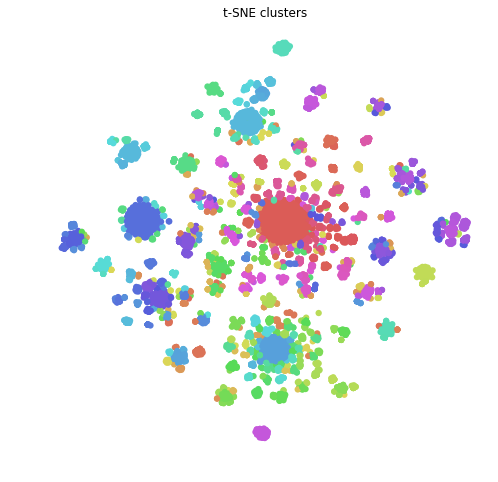

class_filt10_pca80
unclustered count = 404
number of clusters = 637
sil score = nan
---------------------------
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5402 samples in 0.018s...
[t-SNE] Computed neighbors for 5402 samples in 4.395s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5402
[t-SNE] Computed conditional probabilities for sample 2000 / 5402
[t-SNE] Computed conditional probabilities for sample 3000 / 5402
[t-SNE] Computed conditional probabilities for sample 4000 / 5402
[t-SNE] Computed conditional probabilities for sample 5000 / 5402
[t-SNE] Computed conditional probabilities for sample 5402 / 5402
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.402809
[t-SNE] Error after 5000 iterations: -0.056950


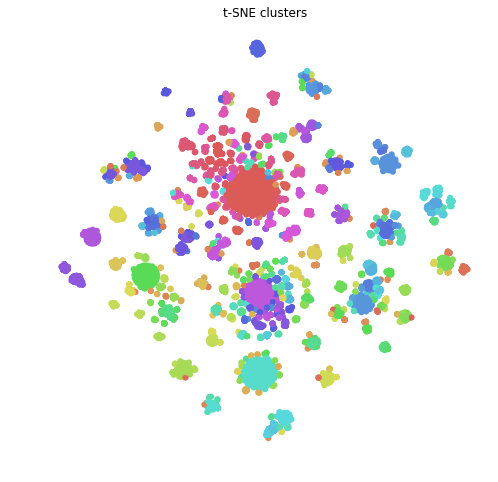

superclass_filt10_pca50n
unclustered count = 371
number of clusters = 466
sil score = 0.945440274711158
---------------------------
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5435 samples in 0.009s...
[t-SNE] Computed neighbors for 5435 samples in 1.032s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5435
[t-SNE] Computed conditional probabilities for sample 2000 / 5435
[t-SNE] Computed conditional probabilities for sample 3000 / 5435
[t-SNE] Computed conditional probabilities for sample 4000 / 5435
[t-SNE] Computed conditional probabilities for sample 5000 / 5435
[t-SNE] Computed conditional probabilities for sample 5435 / 5435
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.466560
[t-SNE] Error after 5000 iterations: 0.152535


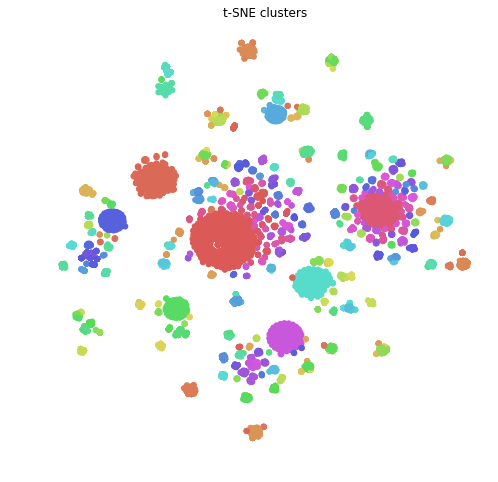

superclass_filt10_pca80
unclustered count = 337
number of clusters = 580
sil score = nan
---------------------------
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5469 samples in 0.026s...
[t-SNE] Computed neighbors for 5469 samples in 5.341s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5469
[t-SNE] Computed conditional probabilities for sample 2000 / 5469
[t-SNE] Computed conditional probabilities for sample 3000 / 5469
[t-SNE] Computed conditional probabilities for sample 4000 / 5469
[t-SNE] Computed conditional probabilities for sample 5000 / 5469
[t-SNE] Computed conditional probabilities for sample 5469 / 5469
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.480114
[t-SNE] Error after 5000 iterations: 0.205476


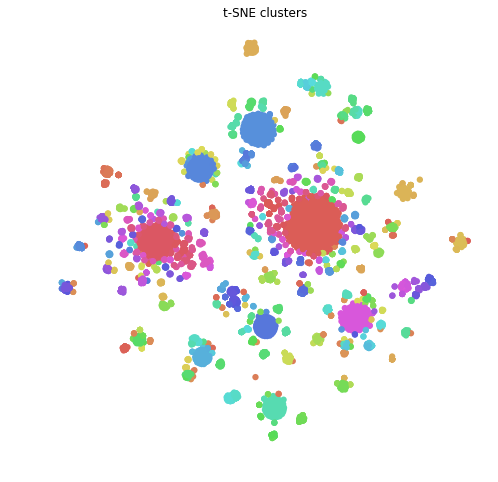

superclass_filt10_pca90
unclustered count = 344
number of clusters = 574
sil score = nan
---------------------------
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5462 samples in 0.023s...
[t-SNE] Computed neighbors for 5462 samples in 5.186s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5462
[t-SNE] Computed conditional probabilities for sample 2000 / 5462
[t-SNE] Computed conditional probabilities for sample 3000 / 5462
[t-SNE] Computed conditional probabilities for sample 4000 / 5462
[t-SNE] Computed conditional probabilities for sample 5000 / 5462
[t-SNE] Computed conditional probabilities for sample 5462 / 5462
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.329876
[t-SNE] Error after 5000 iterations: 0.223359


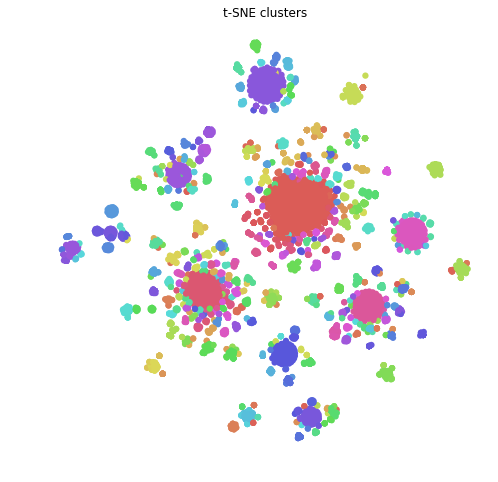

In [20]:
# cut down number of models by lowest unclustered
# try different perplexity and n_iter

for model in [model_class_filt10_pca90,
              model_class_filt10_pca80,
              model_superclass_filt10_pca50n,
              model_superclass_filt10_pca80,
              model_superclass_filt10_pca90
             ]:
    model.cluster_info()
    model.tsne_viz(perplexity=50,n_iter=5000)

In [21]:
for model in [model_class_filt0_pca50n,
             model_class_filt0_pca80,
             model_class_filt0_pca90,
             model_class_filt5_pca50n,
             model_class_filt5_pca80,
             model_class_filt5_pca90,
             model_class_filt10_pca50n,
             model_class_filt10_pca80,
             model_class_filt10_pca90,
             model_superclass_filt0_pca50n,
             model_superclass_filt0_pca80,
             model_superclass_filt0_pca90,
             model_superclass_filt5_pca50n,
             model_superclass_filt5_pca80,
             model_superclass_filt5_pca90,
             model_superclass_filt10_pca50n,
             model_superclass_filt10_pca80,
             model_superclass_filt10_pca90]:
    model.to_pickle()

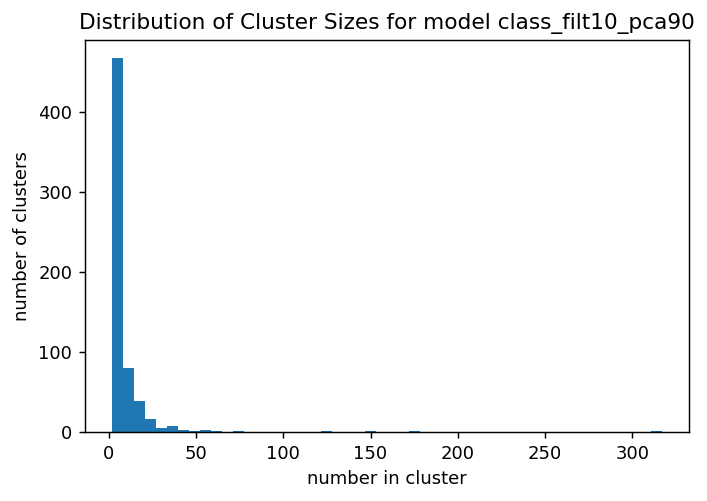

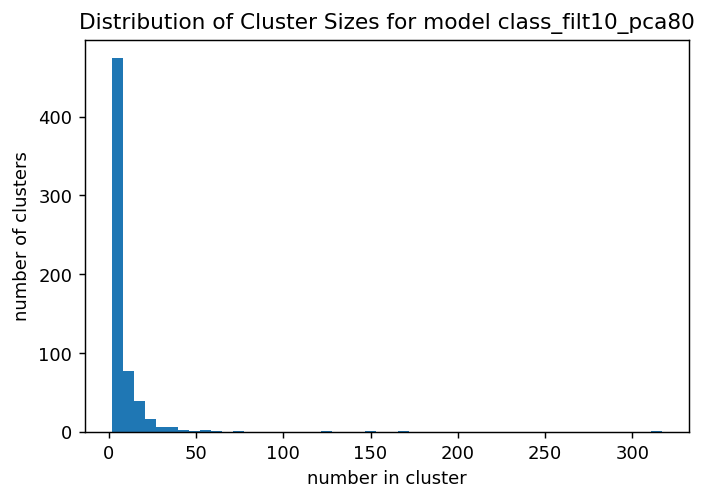

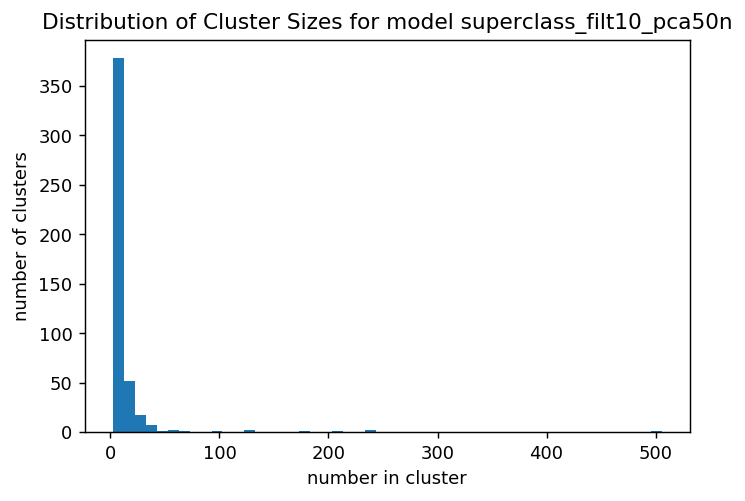

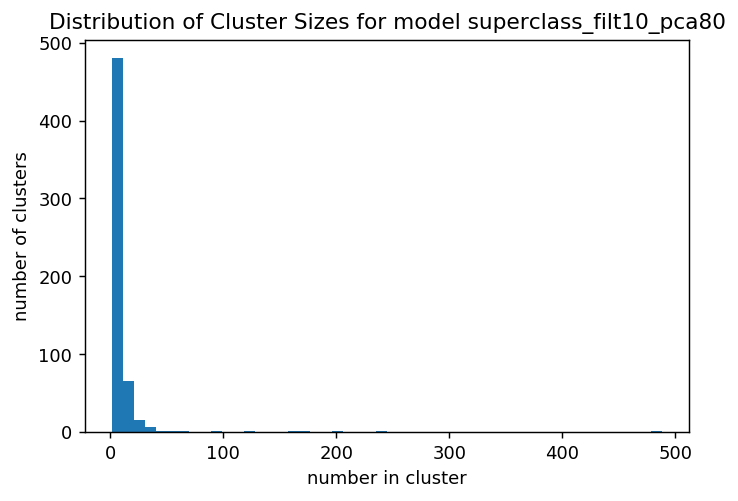

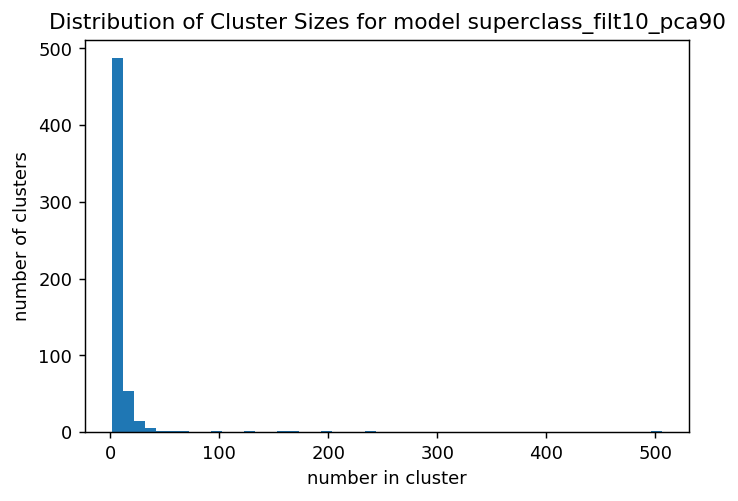

In [22]:
for model in [model_class_filt10_pca90,
              model_class_filt10_pca80,
              model_superclass_filt10_pca50n,
              model_superclass_filt10_pca80,
              model_superclass_filt10_pca90]:
    plt.figure(dpi=130)
    plt.title('Distribution of Cluster Sizes for model '+str(model.name))
    plt.xlabel('number in cluster')
    plt.ylabel('number of clusters')
    plt.hist(list(collections.Counter(model.clustered_clusters).values()),bins=50);

In [23]:
model_superclass_filt10_pca80.cluster_counts.most_common()

[(579, 488),
 (-1, 337),
 (565, 238),
 (339, 205),
 (475, 173),
 (346, 158),
 (357, 127),
 (253, 126),
 (316, 93),
 (62, 64),
 (267, 56),
 (57, 54),
 (69, 48),
 (200, 40),
 (165, 38),
 (20, 36),
 (151, 34),
 (103, 33),
 (189, 33),
 (42, 31),
 (129, 31),
 (404, 30),
 (143, 29),
 (2, 27),
 (49, 27),
 (161, 27),
 (236, 27),
 (54, 26),
 (169, 26),
 (343, 26),
 (366, 26),
 (207, 24),
 (428, 24),
 (202, 23),
 (210, 23),
 (52, 21),
 (209, 21),
 (246, 21),
 (100, 20),
 (147, 20),
 (231, 20),
 (274, 20),
 (50, 19),
 (107, 19),
 (205, 19),
 (242, 19),
 (458, 19),
 (186, 18),
 (221, 18),
 (282, 18),
 (299, 18),
 (402, 18),
 (261, 17),
 (307, 17),
 (372, 17),
 (433, 17),
 (272, 16),
 (276, 16),
 (278, 16),
 (415, 16),
 (430, 16),
 (496, 16),
 (10, 15),
 (13, 15),
 (187, 15),
 (222, 15),
 (279, 15),
 (349, 15),
 (350, 15),
 (371, 15),
 (510, 15),
 (112, 14),
 (238, 14),
 (255, 14),
 (324, 14),
 (422, 14),
 (482, 14),
 (269, 13),
 (270, 13),
 (294, 13),
 (361, 13),
 (362, 13),
 (390, 13),
 (391, 13)

In [19]:
class subcluster:
    
    def __init__(self,parent,size):
        self.name = parent.name.replace('filt','f').replace('pca','p')+'_c'+str(size)
        self.model = cluster_model(self.name)
        self.model.pca_features = parent.pca_features[parent.clusters==size,:]
        
    def cluster_more(self,clusterer,perplexity,n_iter):
        self.model.get_clusters(clusterer)
        self.model.cluster_info()
        self.model.tsne_viz(perplexity,n_iter)
        print('cluster counts: ' + str(self.model.cluster_counts))

superclass_f10_p80


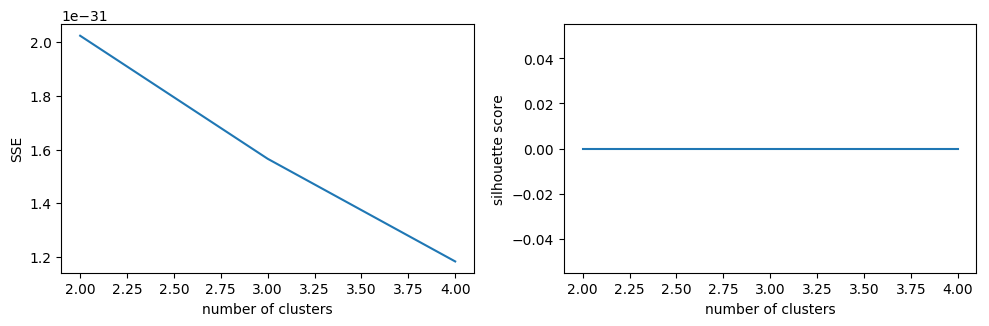

superclass_f10_p80


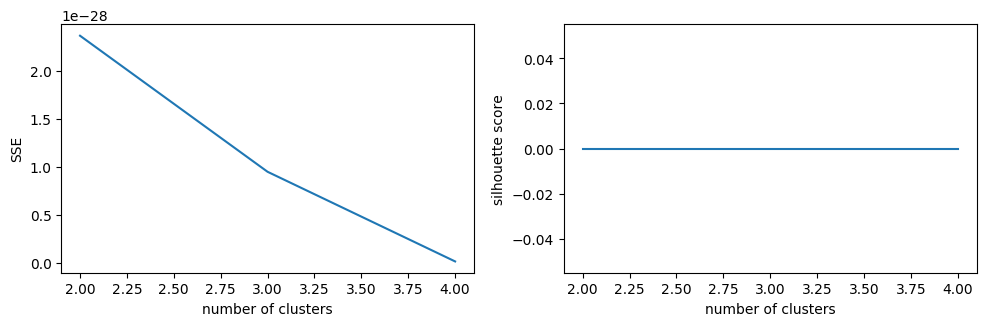

superclass_f10_p80


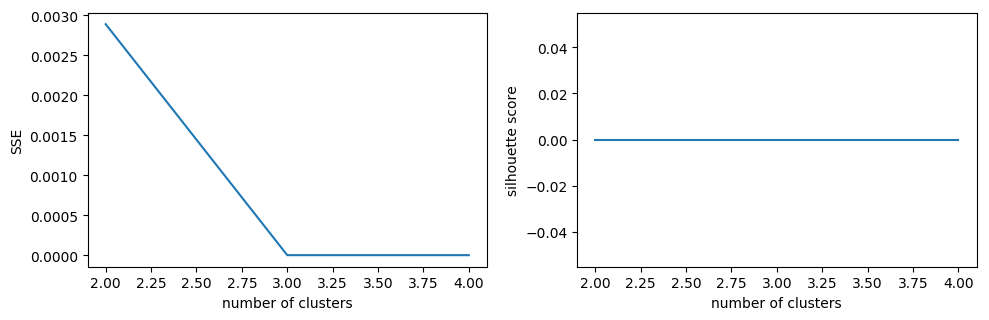

superclass_f10_p80


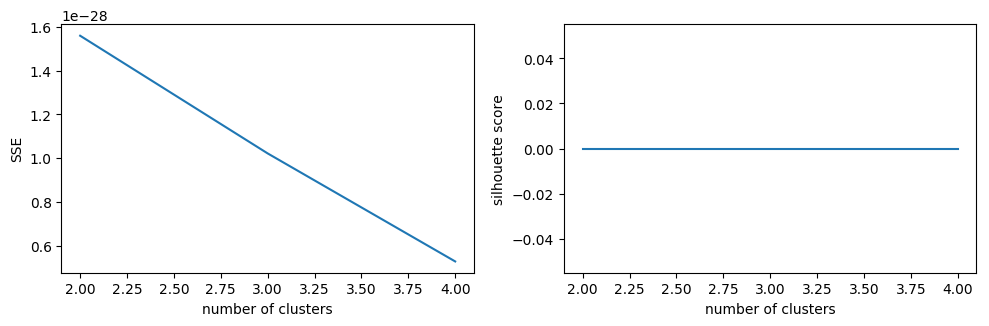

superclass_f10_p80


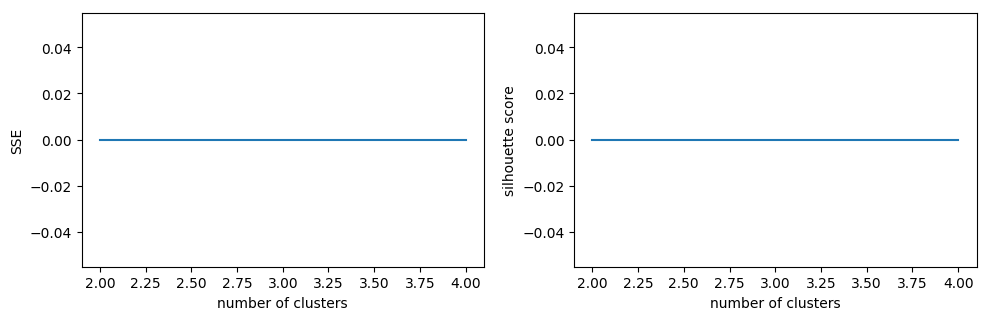

superclass_f10_p80


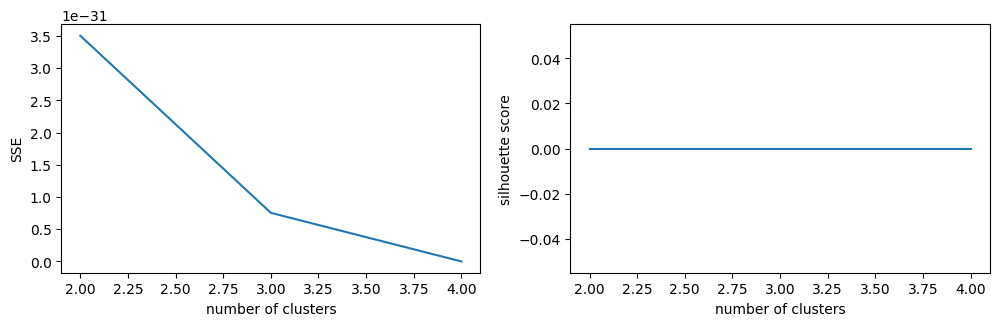

superclass_f10_p80


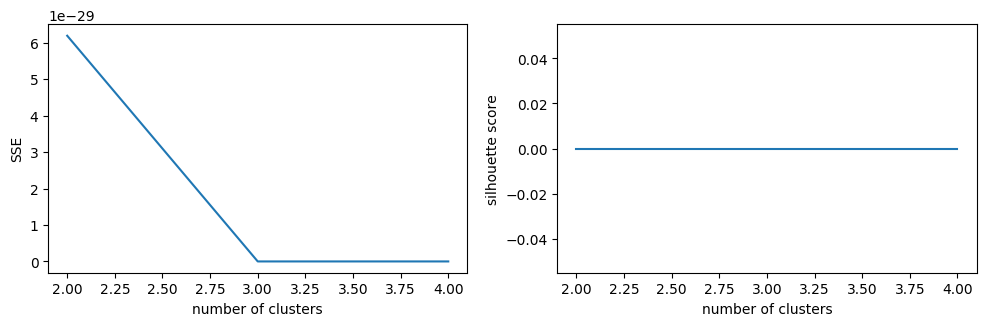

In [42]:
model_superclass_f10_p80_c579 = subcluster(model_superclass_filt10_pca80,579)
model_superclass_f10_p80_c565 = subcluster(model_superclass_filt10_pca80,565)
model_superclass_f10_p80_c339 = subcluster(model_superclass_filt10_pca80,339)
model_superclass_f10_p80_c475 = subcluster(model_superclass_filt10_pca80,475)
model_superclass_f10_p80_c346 = subcluster(model_superclass_filt10_pca80,346)
model_superclass_f10_p80_c357 = subcluster(model_superclass_filt10_pca80,357)
model_superclass_f10_p80_c253 = subcluster(model_superclass_filt10_pca80,253)

for model in [model_superclass_f10_p80_c579,
              model_superclass_f10_p80_c565,
              model_superclass_f10_p80_c339,
              model_superclass_f10_p80_c475,
              model_superclass_f10_p80_c346,
              model_superclass_f10_p80_c357,
              model_superclass_f10_p80_c253]:
    print(model.name)
    model.model.plot_km_score(list(np.arange(2,5)))

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


superclass_f10_p80_c579
unclustered count = 8
number of clusters = 2
sil score = nan
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 480 samples in 0.001s...
[t-SNE] Computed neighbors for 480 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 480 / 480
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 131.023514
[t-SNE] Error after 700 iterations: 3.916142


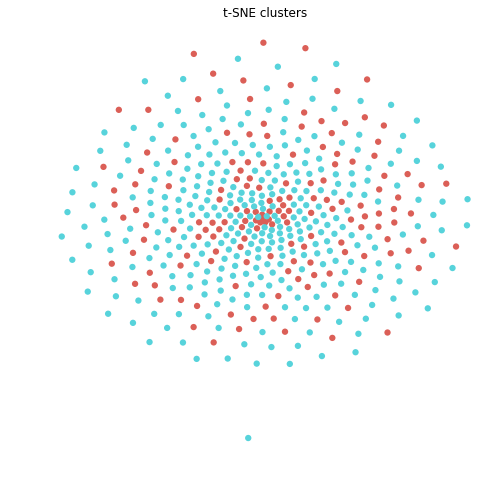

cluster counts: Counter({1: 323, 0: 157, -1: 8})
superclass_f10_p80_c565
unclustered count = 9
number of clusters = 2
sil score = 0.0
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 229 samples in 0.000s...
[t-SNE] Computed neighbors for 229 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 229 / 229
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 133.912521
[t-SNE] Error after 1200 iterations: 3.057545


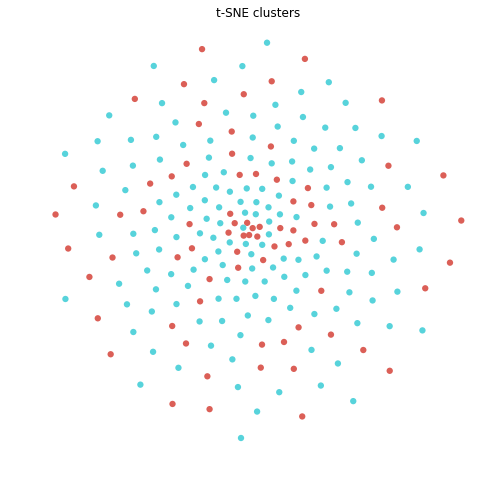

cluster counts: Counter({1: 152, 0: 77, -1: 9})
superclass_f10_p80_c339
unclustered count = 9
number of clusters = 2
sil score = 0.0
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.394867
[t-SNE] Error after 950 iterations: 2.862142


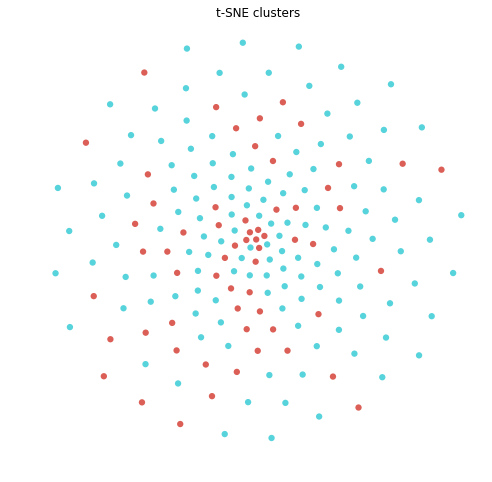

cluster counts: Counter({1: 135, 0: 61, -1: 9})
superclass_f10_p80_c475
unclustered count = 10
number of clusters = 2
sil score = -9.040688793666134e-16
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 163 samples in 0.000s...
[t-SNE] Computed neighbors for 163 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 163 / 163
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.381516
[t-SNE] Error after 700 iterations: 2.669714


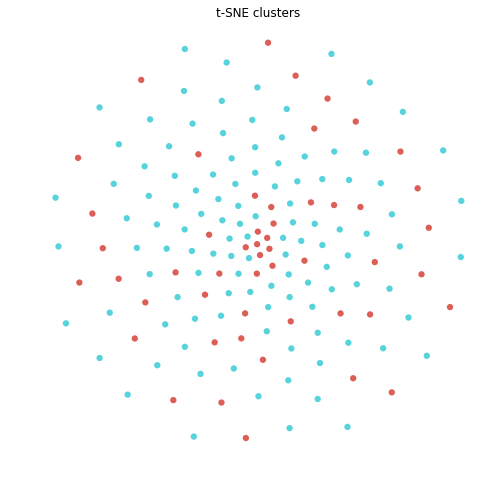

cluster counts: Counter({1: 112, 0: 51, -1: 10})
superclass_f10_p80_c346
unclustered count = 1
number of clusters = 2
sil score = nan
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.000s...
[t-SNE] Computed neighbors for 157 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 0.000000


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 117.561455
[t-SNE] Error after 1600 iterations: 2.648200


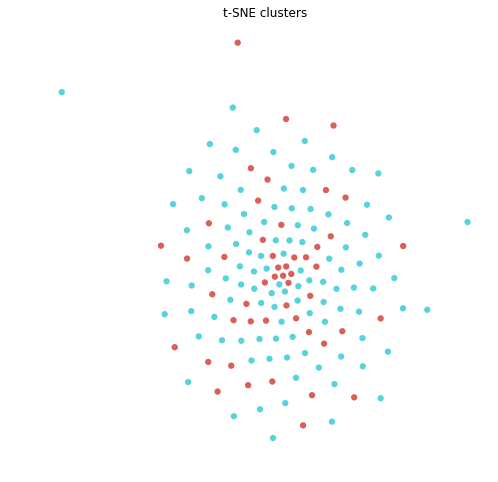

cluster counts: Counter({1: 108, 0: 49, -1: 1})
superclass_f10_p80_c357
unclustered count = 3
number of clusters = 2
sil score = 2.9558952751565127e-16
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 124 samples in 0.000s...
[t-SNE] Computed neighbors for 124 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 124 / 124
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 124.149994
[t-SNE] Error after 1500 iterations: 2.362420


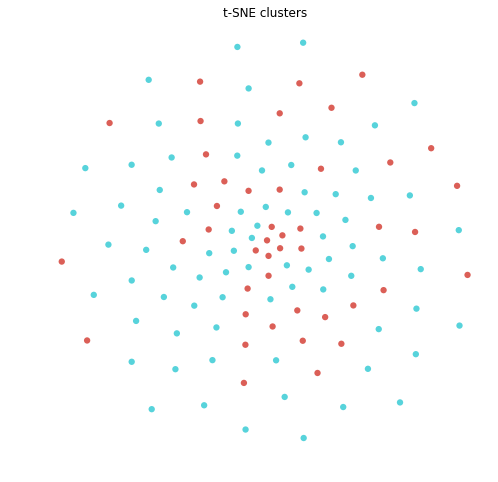

cluster counts: Counter({1: 79, 0: 45, -1: 3})
superclass_f10_p80_c253
unclustered count = 2
number of clusters = 2
sil score = nan
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 124 samples in 0.000s...
[t-SNE] Computed neighbors for 124 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 124 / 124
[t-SNE] Mean sigma: 0.000000


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 114.659096
[t-SNE] Error after 2000 iterations: 2.364929


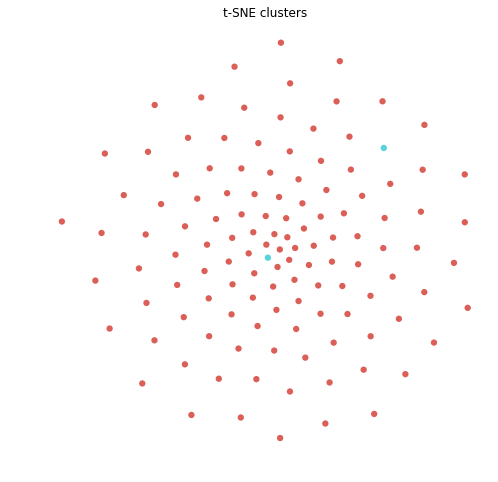

cluster counts: Counter({0: 122, 1: 2, -1: 2})


In [21]:
for model in [model_superclass_f10_p80_c579,
              model_superclass_f10_p80_c565,
              model_superclass_f10_p80_c339,
              model_superclass_f10_p80_c475,
              model_superclass_f10_p80_c346,
              model_superclass_f10_p80_c357,
              model_superclass_f10_p80_c253]:
    model.cluster_more(hdbs2,2,3000)

In [57]:
# loss of information by using superclass instead of class

model_class_filt10_pca80.cluster_counts.most_common()

[(-1, 404),
 (635, 317),
 (299, 170),
 (500, 151),
 (203, 125),
 (368, 76),
 (371, 75),
 (142, 64),
 (487, 57),
 (314, 53),
 (446, 53),
 (96, 50),
 (111, 48),
 (367, 44),
 (182, 41),
 (428, 40),
 (149, 39),
 (399, 39),
 (463, 38),
 (88, 37),
 (400, 37),
 (356, 36),
 (406, 36),
 (80, 33),
 (119, 33),
 (305, 33),
 (172, 32),
 (76, 31),
 (255, 30),
 (440, 30),
 (15, 27),
 (154, 26),
 (188, 26),
 (334, 26),
 (438, 26),
 (465, 26),
 (507, 26),
 (57, 25),
 (417, 25),
 (12, 24),
 (117, 23),
 (436, 22),
 (452, 22),
 (565, 22),
 (124, 21),
 (208, 21),
 (478, 21),
 (92, 20),
 (206, 20),
 (301, 20),
 (476, 20),
 (519, 20),
 (547, 20),
 (137, 19),
 (168, 19),
 (217, 19),
 (414, 19),
 (536, 19),
 (605, 19),
 (0, 18),
 (5, 18),
 (204, 18),
 (448, 18),
 (586, 18),
 (609, 18),
 (146, 17),
 (235, 17),
 (538, 17),
 (563, 17),
 (1, 16),
 (271, 16),
 (320, 16),
 (407, 16),
 (479, 16),
 (570, 16),
 (40, 15),
 (69, 15),
 (91, 15),
 (100, 15),
 (287, 15),
 (346, 15),
 (348, 15),
 (353, 15),
 (384, 15),
 (443

In [55]:
model_class_filt10_pca90.cluster_counts.most_common()

[(-1, 404),
 (629, 317),
 (395, 176),
 (356, 151),
 (337, 126),
 (437, 76),
 (336, 74),
 (242, 64),
 (120, 58),
 (216, 53),
 (406, 53),
 (283, 50),
 (279, 48),
 (450, 46),
 (354, 41),
 (305, 40),
 (458, 39),
 (508, 39),
 (503, 38),
 (486, 37),
 (495, 36),
 (501, 36),
 (166, 35),
 (239, 34),
 (134, 32),
 (197, 32),
 (478, 32),
 (181, 31),
 (371, 30),
 (16, 27),
 (225, 27),
 (301, 26),
 (310, 26),
 (489, 26),
 (493, 26),
 (535, 26),
 (91, 25),
 (387, 25),
 (492, 25),
 (12, 23),
 (260, 23),
 (563, 23),
 (111, 22),
 (506, 22),
 (255, 21),
 (521, 21),
 (118, 20),
 (175, 20),
 (339, 20),
 (472, 20),
 (527, 20),
 (112, 19),
 (186, 19),
 (269, 19),
 (498, 19),
 (519, 19),
 (542, 19),
 (0, 18),
 (194, 18),
 (334, 18),
 (382, 18),
 (531, 18),
 (607, 18),
 (205, 17),
 (213, 17),
 (511, 17),
 (561, 17),
 (1, 16),
 (8, 16),
 (185, 16),
 (256, 16),
 (377, 16),
 (386, 16),
 (392, 16),
 (502, 16),
 (516, 16),
 (586, 16),
 (93, 15),
 (124, 15),
 (130, 15),
 (284, 15),
 (443, 15),
 (445, 15),
 (481, 15)

class_f10_p90


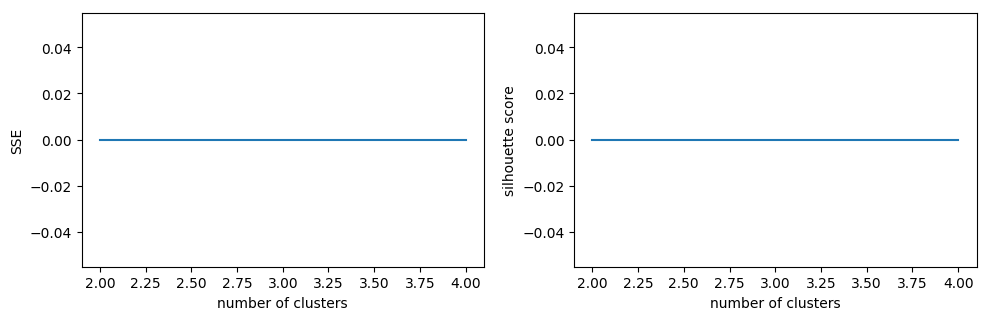

class_f10_p90


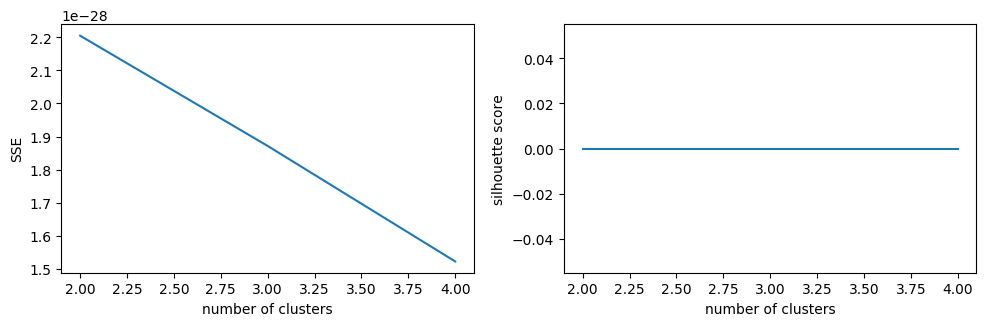

class_f10_p90


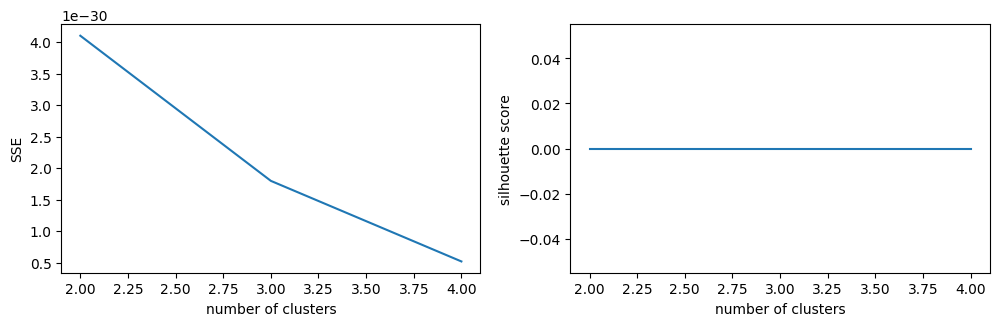

class_f10_p90


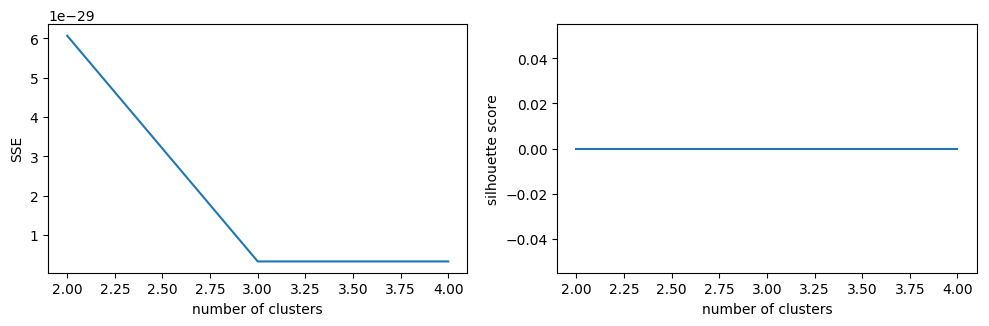

In [59]:
model_class_f10_p90_c629 = subcluster(model_class_filt10_pca90,629)
model_class_f10_p90_c395 = subcluster(model_class_filt10_pca90,395)
model_class_f10_p90_c356 = subcluster(model_class_filt10_pca90,356)
model_class_f10_p90_c337 = subcluster(model_class_filt10_pca90,337)

for model in [model_class_f10_p90_c629,
              model_class_f10_p90_c395,
              model_class_f10_p90_c356,
              model_class_f10_p90_c337]:
    print(model.name)
    model.model.plot_km_score(list(np.arange(2,5)))

class_f10_p90_c629
unclustered count = 1
number of clusters = 2
sil score = 4.444092998198354e-16
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 316 samples in 0.001s...
[t-SNE] Computed neighbors for 316 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 316 / 316
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 163.786041
[t-SNE] Error after 1800 iterations: 3.488851


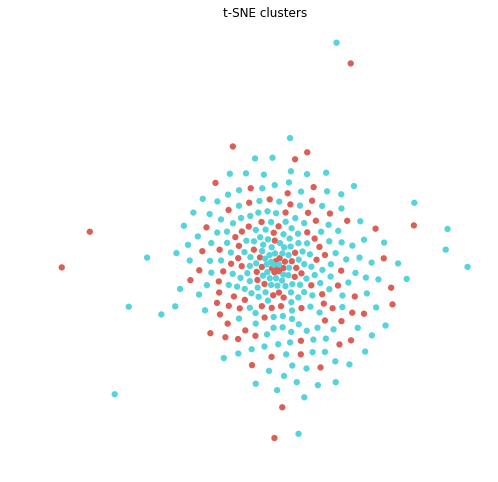

cluster counts: Counter({1: 208, 0: 108, -1: 1})
class_f10_p90_c395
unclustered count = 18
number of clusters = 2
sil score = nan
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 158 samples in 0.000s...
[t-SNE] Computed neighbors for 158 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 158 / 158
[t-SNE] Mean sigma: 0.000000


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.074265
[t-SNE] Error after 1950 iterations: 2.654341


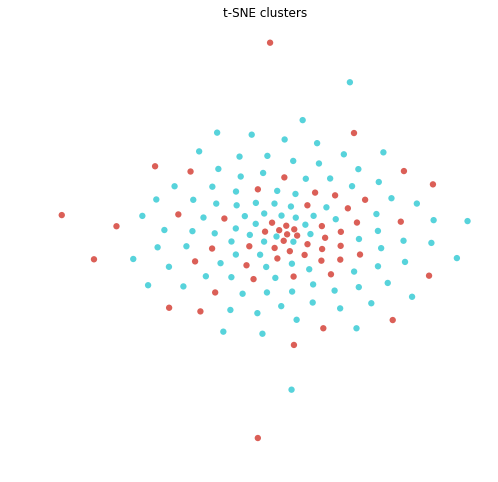

cluster counts: Counter({1: 102, 0: 56, -1: 18})
class_f10_p90_c356
unclustered count = 6
number of clusters = 2
sil score = nan
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 145 samples in 0.000s...
[t-SNE] Computed neighbors for 145 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 145 / 145
[t-SNE] Mean sigma: 0.000000


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 109.788483
[t-SNE] Error after 1150 iterations: 2.543410


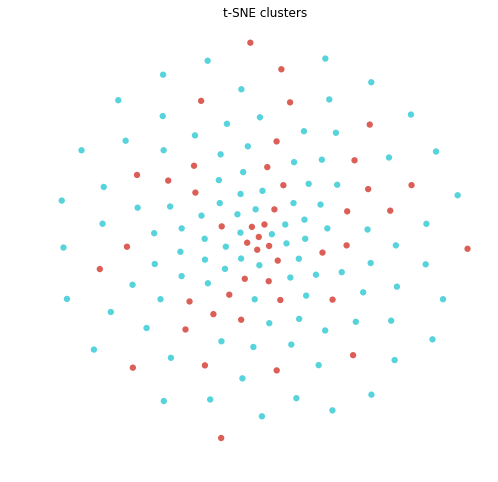

cluster counts: Counter({1: 100, 0: 45, -1: 6})
class_f10_p90_c337
unclustered count = 4
number of clusters = 2
sil score = nan
---------------------------
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 122 samples in 0.000s...
[t-SNE] Computed neighbors for 122 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 122 / 122
[t-SNE] Mean sigma: 0.000000


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 112.268059
[t-SNE] Error after 1350 iterations: 2.346638


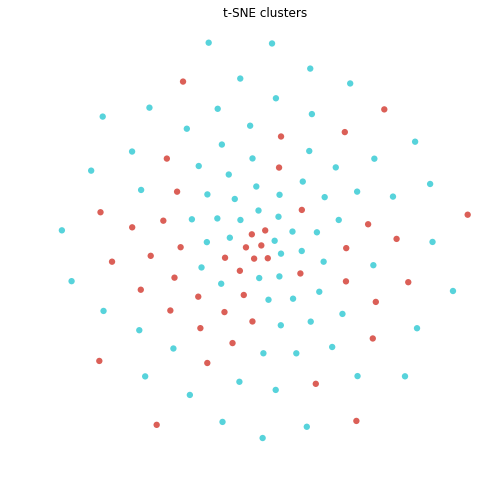

cluster counts: Counter({1: 77, 0: 45, -1: 4})


In [23]:
for model in [model_class_f10_p90_c629,
              model_class_f10_p90_c395,
              model_class_f10_p90_c356,
              model_class_f10_p90_c337]:
    model.cluster_more(hdbs2,2,3000)

Based on the above TSNE visualizations, it would appear that further clustering is not meaningful.

In [62]:
from pprint import pprint
pprint(re.sub(r'[\']','',str([x for x in dir() if re.search(r'model_',x)!=None])))

('[model_class_f10_p90_c337, model_class_f10_p90_c356, '
 'model_class_f10_p90_c395, model_class_f10_p90_c629, '
 'model_class_filt0_pca50n, model_class_filt0_pca80, model_class_filt0_pca90, '
 'model_class_filt10_pca50n, model_class_filt10_pca80, '
 'model_class_filt10_pca90, model_class_filt5_pca50n, model_class_filt5_pca80, '
 'model_class_filt5_pca90, model_superclass_f10_p80_c253, '
 'model_superclass_f10_p80_c339, model_superclass_f10_p80_c346, '
 'model_superclass_f10_p80_c357, model_superclass_f10_p80_c475, '
 'model_superclass_f10_p80_c565, model_superclass_f10_p80_c579, '
 'model_superclass_filt0_pca50n, model_superclass_filt0_pca80, '
 'model_superclass_filt0_pca90, model_superclass_filt10_pca50n, '
 'model_superclass_filt10_pca80, model_superclass_filt10_pca90, '
 'model_superclass_filt5_pca50n, model_superclass_filt5_pca80, '
 'model_superclass_filt5_pca90]')


In [24]:
for model in [model_class_f10_p90_c337, model_class_f10_p90_c356,
            model_class_f10_p90_c395, model_class_f10_p90_c629,
            model_class_filt0_pca50n, model_class_filt0_pca80, 
            model_class_filt0_pca90, model_class_filt10_pca50n, 
            model_class_filt10_pca80, model_class_filt10_pca90, 
            model_class_filt5_pca50n, model_class_filt5_pca80,
            model_class_filt5_pca90, model_superclass_f10_p80_c253,
            model_superclass_f10_p80_c339, model_superclass_f10_p80_c346,
            model_superclass_f10_p80_c357, model_superclass_f10_p80_c475,
            model_superclass_f10_p80_c565, model_superclass_f10_p80_c579,
            model_superclass_filt0_pca50n, model_superclass_filt0_pca80,
            model_superclass_filt0_pca90, model_superclass_filt10_pca50n,
            model_superclass_filt10_pca80, model_superclass_filt10_pca90,
            model_superclass_filt5_pca50n, model_superclass_filt5_pca80,
            model_superclass_filt5_pca90]:
    try: 
        model.to_pickle()
    except:
        model.model.to_pickle()